In [60]:
# Importing required packages

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import datetime as dt

%matplotlib inline


In [61]:
# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ignoring warnings
warnings.filterwarnings("ignore")

In [62]:
rex

,datetime,CO
0,14/08/2020 00:00,0.29
1,14/08/2020 00:01,0.29
2,14/08/2020 00:02,0.29
3,14/08/2020 00:03,0.28
4,14/08/2020 00:04,0.28
...,...,...
33115,05/09/2020 23:55,0.21
33116,05/09/2020 23:56,0.21
33117,05/09/2020 23:57,0.20
33118,05/09/2020 23:58,0.20


## Sense Check Of CarbonMonoxide Data


## Viewing the data

In [63]:
rex.head()

,datetime,CO
0,14/08/2020 00:00,0.29
1,14/08/2020 00:01,0.29
2,14/08/2020 00:02,0.29
3,14/08/2020 00:03,0.28
4,14/08/2020 00:04,0.28


## Viewing the shape of the data

In [64]:
rex.shape

(33120, 2)

### There are 33120 rows and 2 columns

## Viewing the data type of the columns

In [65]:
rex.dtypes

datetime     object
CO          float64
dtype: object

### Information regarding the dataset

In [66]:
rex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33120 entries, 0 to 33119
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  33120 non-null  object 
 1   CO        29976 non-null  float64
dtypes: float64(1), object(1)
memory usage: 517.6+ KB


In [67]:
rex.describe()

,CO
count,29976.000000
mean,0.276325
std,0.147355
min,0.080000
25%,0.190000
50%,0.240000
75%,0.320000
max,5.630000


In [27]:

df = rex.copy(deep = False)

## Missing Value Analysis

In [28]:
# Calculating the percent of missing values in the dataframe
percentMissing = (df.isnull().sum() / len(df)) * 100

In [29]:
percentMissing 

datetime    0.000000
CO          9.492754
dtype: float64

In [79]:
rex["microseconds"]=rex["datetime"].apply(lambda x: dt.datetime.strptime(x,'%d/%m/%Y %H:%M').timestamp())

In [80]:
rex

,datetime,CO,microsceconds,microseconds
0,14/08/2020 00:00,0.29,1.597343e+09,1.597343e+09
1,14/08/2020 00:01,0.29,1.597343e+09,1.597343e+09
2,14/08/2020 00:02,0.29,1.597344e+09,1.597344e+09
3,14/08/2020 00:03,0.28,1.597344e+09,1.597344e+09
4,14/08/2020 00:04,0.28,1.597344e+09,1.597344e+09
...,...,...,...,...
33115,05/09/2020 23:55,0.21,1.599330e+09,1.599330e+09
33116,05/09/2020 23:56,0.21,1.599330e+09,1.599330e+09
33117,05/09/2020 23:57,0.20,1.599330e+09,1.599330e+09
33118,05/09/2020 23:58,0.20,1.599330e+09,1.599330e+09


In [140]:
rex = rex.dropna()

In [141]:
X = rex[["CO","microseconds"]]

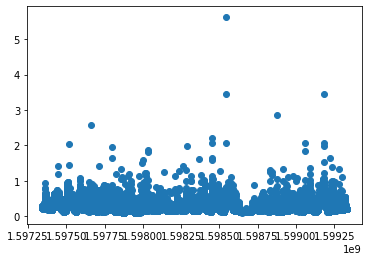

In [142]:
plt.scatter(X["microseconds"], X["CO"])
plt.show()

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
print(X[:,0].describe())

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

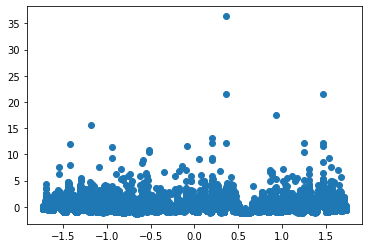

In [144]:
plt.scatter(X[:,1], X[:,0])
plt.show()

In [149]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [150]:
principalDf

,principal component 1,principal component 2
0,1.291027,-1.159780
1,1.290953,-1.159706
2,1.290880,-1.159632
3,1.242818,-1.207545
4,1.242744,-1.207471
...,...,...
29971,-1.540981,0.904433
29972,-1.541055,0.904506
29973,-1.589116,0.856593
29974,-1.589190,0.856667


In [126]:
principalDf.describe()

,principal component 1,principal component 2
count,2.997600e+04,2.997600e+04
mean,-4.502670e-16,7.060598e-16
std,1.014280e+00,9.855468e-01
min,-1.828856e+00,-1.798211e+00
25%,-7.355097e-01,-7.169831e-01
50%,-1.067084e-01,-1.331279e-01
75%,5.813581e-01,6.147008e-01
max,2.543420e+01,2.594745e+01


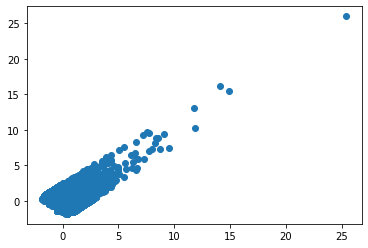

In [122]:
plt.scatter(principalDf["principal component 1"],principalDf["principal component 2"])
plt.show()